## Observations and Insights 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [137]:
# Checking the number of mice.
Number_of_mice = len(pd.unique(combined_data["Mouse ID"]))
Number_of_mice


249

In [138]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
df = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_data[combined_data['Mouse ID'] != 'g989']
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice in the clean DataFrame.
Number_of_mice_clean = len(pd.unique(new_df["Mouse ID"]))
Number_of_mice_clean


248

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [143]:
new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [144]:
new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [145]:
new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [146]:
new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
results_df = new_df.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": {"count","mean", "median", "var", "std", "sem"}})
results_df

Drug Regimen Tumor Volume (mm3)                                         \
                              std       mean     median        var count   
0    Capomulin           4.994774  40.675741  41.557809  24.947764   230   
1     Ceftamin           6.268188  52.591172  51.776157  39.290177   178   
2    Infubinol           6.567243  52.884795  51.820584  43.128684   178   
3     Ketapril           8.279709  55.235638  53.698743  68.553577   188   
4     Naftisol           8.134708  54.331565  52.509285  66.173479   186   
5      Placebo           7.821003  54.033581  52.288934  61.168083   181   
6     Propriva           6.622085  52.320930  50.446266  43.852013   148   
7     Ramicane           4.846308  40.216745  40.673236  23.486704   228   
8     Stelasyn           7.710419  54.233149  52.431737  59.450562   181   
9    Zoniferol           6.966589  53.236507  51.818479  48.533355   182   

             
        sem  
0  0.329346  
1  0.469821  
2  0.492236  
3  0.603860  
4  0.596466  
5  0.581331  
6  0.544332  
7  0.320955  
8  0.573111  
9  0.516398

In [148]:
new_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Bar and Pie Charts

In [149]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_r = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

drug_regimen = pd.DataFrame(drug_r)
drug_regimen.index


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

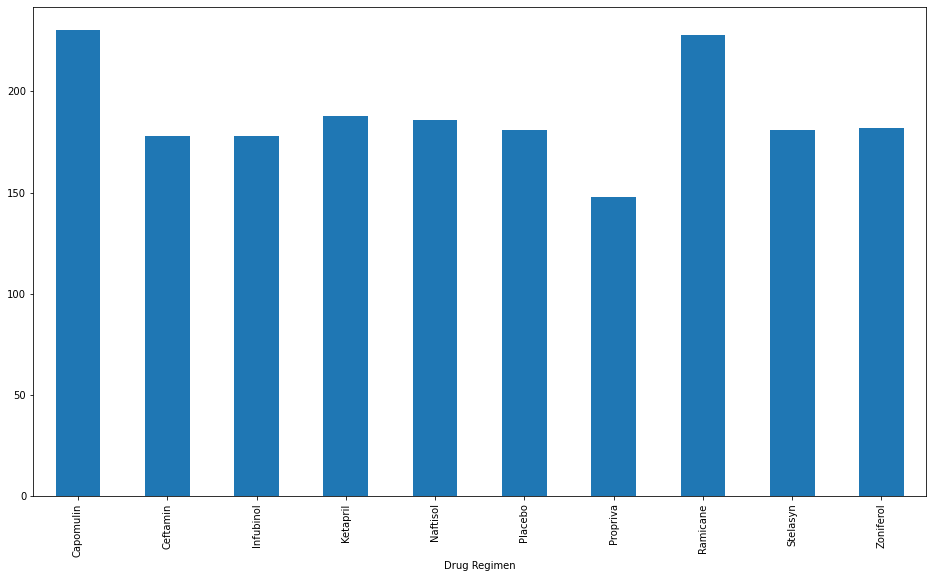

In [150]:
plt = drug_regimen["Tumor Volume (mm3)"].plot(kind = "bar", figsize=(16,9))

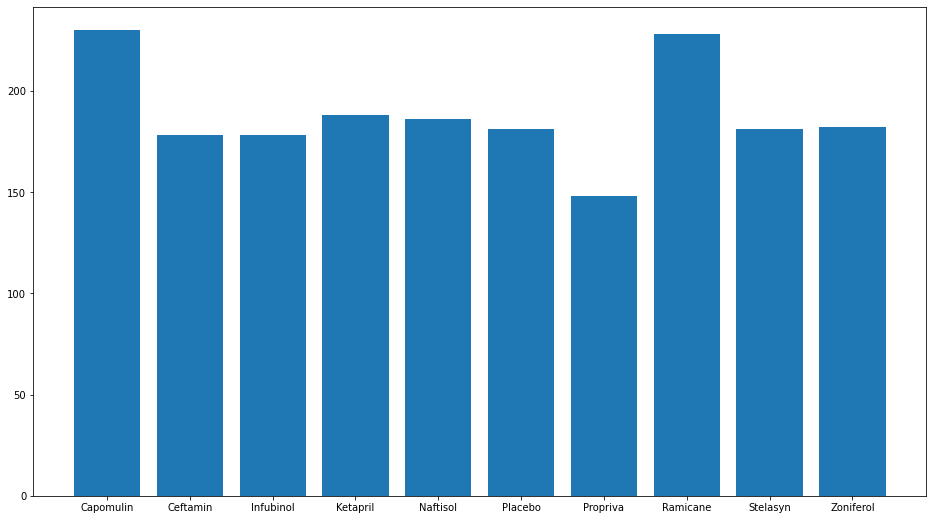

In [151]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

import matplotlib.pyplot as pyplt
#fig = pyplt.figure(figsize = (10, 5))
#drug = drug_regimen["Drug Regimen"].head(12)
Tumor = drug_regimen["Tumor Volume (mm3)"]
fig, ax = pyplt.subplots(figsize =(16, 9))
pyplt.bar(drug_regimen.index.values,Tumor)
pyplt.show()


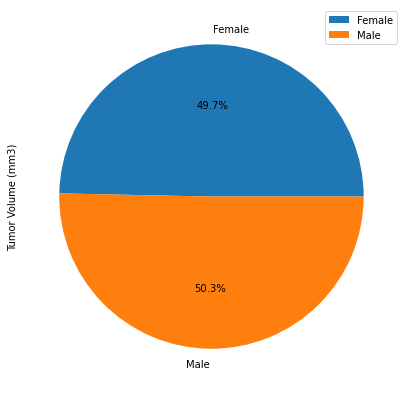

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#plt = drug_regimen["Sex"].plot(kind = "pie")
#drug_regimen.plot.pie(y='Sex', figsize=(5, 5))

new_df.groupby(['Sex']).sum().plot(kind='pie', y = "Tumor Volume (mm3)", figsize =(10,7), autopct='%1.1f%%')


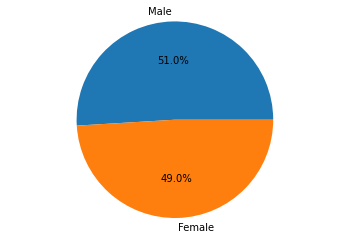

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male, female = new_df["Sex"].value_counts()
my_data = [male,female]
my_labels = 'Male','Female'
pyplt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
#plt.title('My Title')
pyplt.axis('equal')
pyplt.show()



## Quartiles, Outliers and Boxplots

In [154]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint= new_df.groupby('Mouse ID', as_index=False).agg({"Timepoint":"max"})
#greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = greatest_timepoint.merge(new_df, on= "Mouse ID")
merged_df_copy = greatest_timepoint.merge(new_df, on= "Mouse ID")

merged_df


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [155]:
import numpy as np
merged_df["Tumor Volume (mm3)"] =merged_df["Tumor Volume (mm3)"].where(merged_df["Timepoint_x"] == merged_df["Timepoint_y"])
merged_df.dropna()


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,10,48.710661,0
1849,z578,45,Ramicane,Male,11,16,45,30.638696,0
1859,z581,45,Infubinol,Female,24,25,45,62.754451,3
1869,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [156]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = merged_df["Drug Regimen"].unique()
Treatments = list(Treatments)
Treatments
 
     

['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [157]:
merged_df = merged_df.dropna()
merged_df

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,10,48.710661,0
1849,z578,45,Ramicane,Male,11,16,45,30.638696,0
1859,z581,45,Infubinol,Female,24,25,45,62.754451,3
1869,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [158]:
# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_list = []


In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin

new = merged_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])
new_df = merged_df[new]
new_df



,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
66,a411,45,Ramicane,Male,3,22,45,38.407618,1
76,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
1812,y769,45,Ceftamin,Female,6,27,45,68.594745,4
1822,y793,45,Capomulin,Male,17,17,45,31.896238,2
1832,y865,45,Ceftamin,Male,23,26,45,64.729837,3
1849,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [160]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Q1 = new_df['Tumor Volume (mm3)'].quantile(0.25)
Q3 = new_df['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
IQR


22.74251795250001

In [161]:
    # Locate the rows which contain mice on each drug and get the tumor volume


  # add subset 
  # Determine outliers using upper and lower bounds
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print("There outliers exist outside of:", lower_bound, upper_bound)
outliers = new_df["Tumor Volume (mm3)"].where((new_df["Tumor Volume (mm3)"] <= lower_bound)
                                                 & (new_df["Tumor Volume (mm3)"] >= upper_bound))
print(outliers)



There outliers exist outside of: 3.0739668737499812 94.04403868375002
9      NaN
19     NaN
39     NaN
66     NaN
76     NaN
        ..
1812   NaN
1822   NaN
1832   NaN
1849   NaN
1859   NaN
Name: Tumor Volume (mm3), Length: 100, dtype: float64


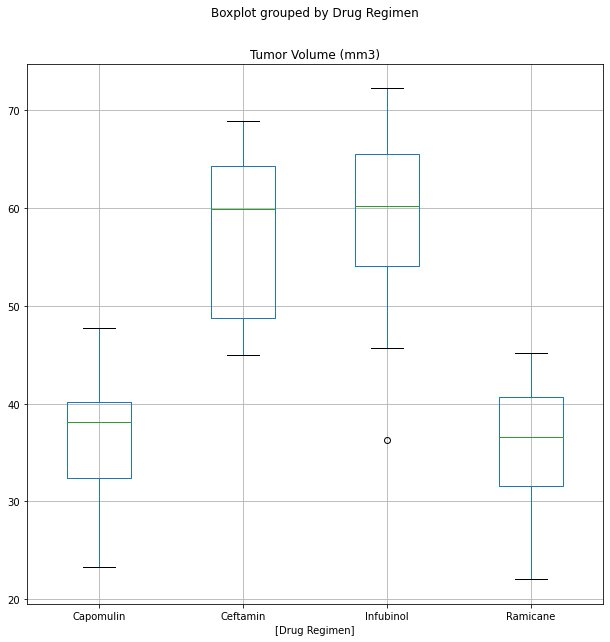

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = new_df.boxplot(column = ['Tumor Volume (mm3)'], by = ['Drug Regimen'], figsize = (10,10))



## Line and Scatter Plots

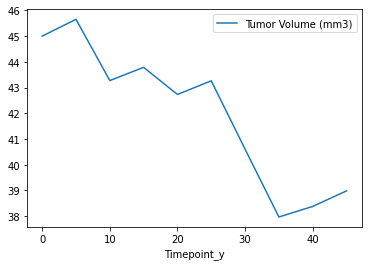

In [163]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
new_plot_df = merged_df_copy.loc[merged_df_copy['Mouse ID'] == 'b128',:]
new_plot_df.plot(kind = "line", y ="Tumor Volume (mm3)", x = "Timepoint_y")

In [164]:
mouse_weight_plot_df = merged_df_copy.loc[merged_df_copy['Drug Regimen'] == 'Capomulin',:]
mouse_df = mouse_weight_plot_df.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":"mean", "Weight (g)":"mean"})
mouse_df

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


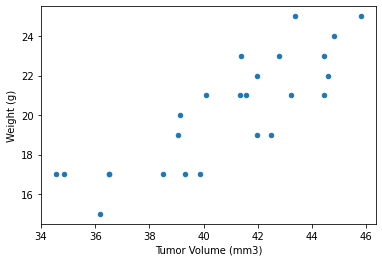

In [165]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_df.plot(kind="scatter",  x ="Tumor Volume (mm3)", y ="Weight (g)" )


## Correlation and Regression

In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from sklearn import datasets, linear_model
from scipy.stats import linregress
X=mouse_df['Weight (g)'].values
Y=mouse_df['Tumor Volume (mm3)'].values
# linear_model.LinearRegression().fit(X,Y)
# pyplt.scatter(X, Y, color = 'red')
# pyplt.show()
X, Y

(array([22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17,
        23, 17, 17, 21, 23, 21, 15, 17], dtype=int64),
 array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
        44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
        42.50726104, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
        43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
        41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925]))

y = 0.95x + 21.55
The correlation coefficient is: 0.8419363424694718
The slope is: 0.9544396890241045
The intercept is: 21.552160532685015


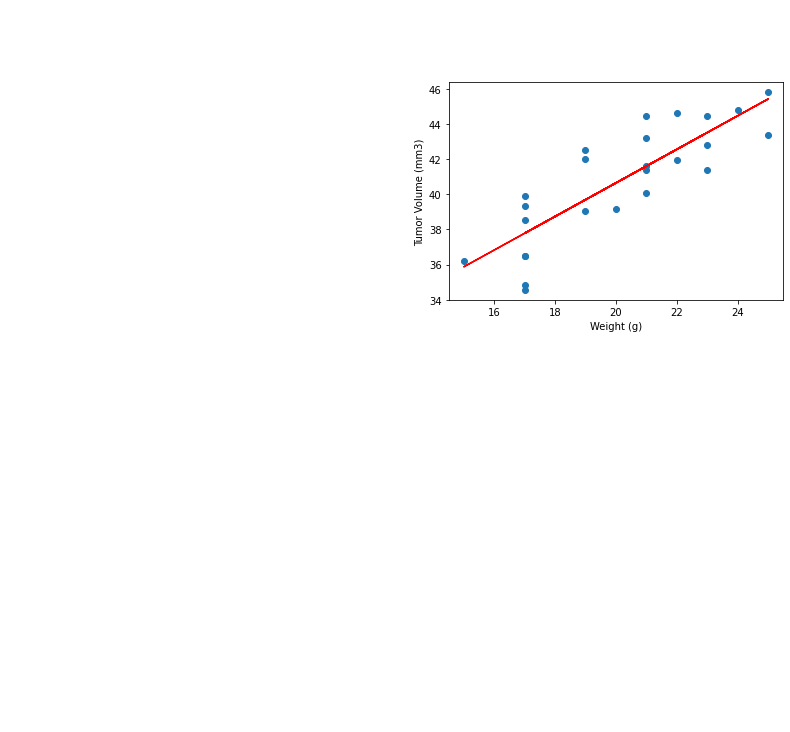

In [167]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pyplt.scatter(X,Y)
pyplt.plot(X,regress_values,"r-")
pyplt.annotate(line_eq,(0,50),fontsize=15,color="red")
pyplt.xlabel('Weight (g)')
pyplt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(line_eq)
pyplt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
pyplt.show()
